# Support Vector Regression (SVR)

## Cài đặt thư viện

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Đọc dữ liệu CSV

In [4]:
dataset = pd.read_csv('VCB.csv')
dataset = dataset.sort_values('thoigian')

In [5]:
# Tạo feature X là số thứ tự của quý (0, 1, 2, ...)
X = np.arange(len(dataset)).reshape(-1, 1)
y = dataset['pe'].values

In [8]:
print(f"Đã load {len(dataset)} điểm dữ liệu P/E")
dataset.head()

Đã load 22 điểm dữ liệu P/E


,thoigian,pe
20,2019 Q1,15.418478
19,2019 Q2,14.913664
18,2019 Q3,15.570829
17,2019 Q4,18.069681
16,2020 Q1,12.786029


## Chuẩn hóa dữ liệu

In [10]:
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa X
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

## Training the SVR model on the Training set

In [11]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_scaled, y)

print("✅ Đã hoàn thành huấn luyện mô hình SVR")

✅ Đã hoàn thành huấn luyện mô hình SVR


## Dự đoán 12 quý tiếp theo

In [13]:
# Tạo index cho 12 quý tương lai
future_quarters_index = np.arange(len(dataset), len(dataset) + 12).reshape(-1, 1)
future_quarters_scaled = sc_X.transform(future_quarters_index)

In [18]:
future_quarters_index

array([[22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33]])

In [14]:
# Dự đoán
future_pe = model.predict(future_quarters_scaled)

In [15]:
results = {}
print("\n=== KẾT QUẢ DỰ ĐOÁN P/E ===")
for i, pe_pred in enumerate(future_pe, 1):
    quarter_name = f"Quý {i}"
    results[quarter_name] = round(pe_pred, 2)
    print(f"{quarter_name}: P/E = {pe_pred:.2f}")


=== KẾT QUẢ DỰ ĐOÁN P/E ===
Quý 1: P/E = 14.58
Quý 2: P/E = 14.73
Quý 3: P/E = 14.84
Quý 4: P/E = 14.91
Quý 5: P/E = 14.95
Quý 6: P/E = 14.98
Quý 7: P/E = 14.99
Quý 8: P/E = 15.00
Quý 9: P/E = 15.00
Quý 10: P/E = 15.00
Quý 11: P/E = 14.99
Quý 12: P/E = 14.99


In [16]:
results

{'Quý 1': np.float64(14.58),
 'Quý 2': np.float64(14.73),
 'Quý 3': np.float64(14.84),
 'Quý 4': np.float64(14.91),
 'Quý 5': np.float64(14.95),
 'Quý 6': np.float64(14.98),
 'Quý 7': np.float64(14.99),
 'Quý 8': np.float64(15.0),
 'Quý 9': np.float64(15.0),
 'Quý 10': np.float64(15.0),
 'Quý 11': np.float64(14.99),
 'Quý 12': np.float64(14.99)}

## Vẽ biểu đồ trực quan

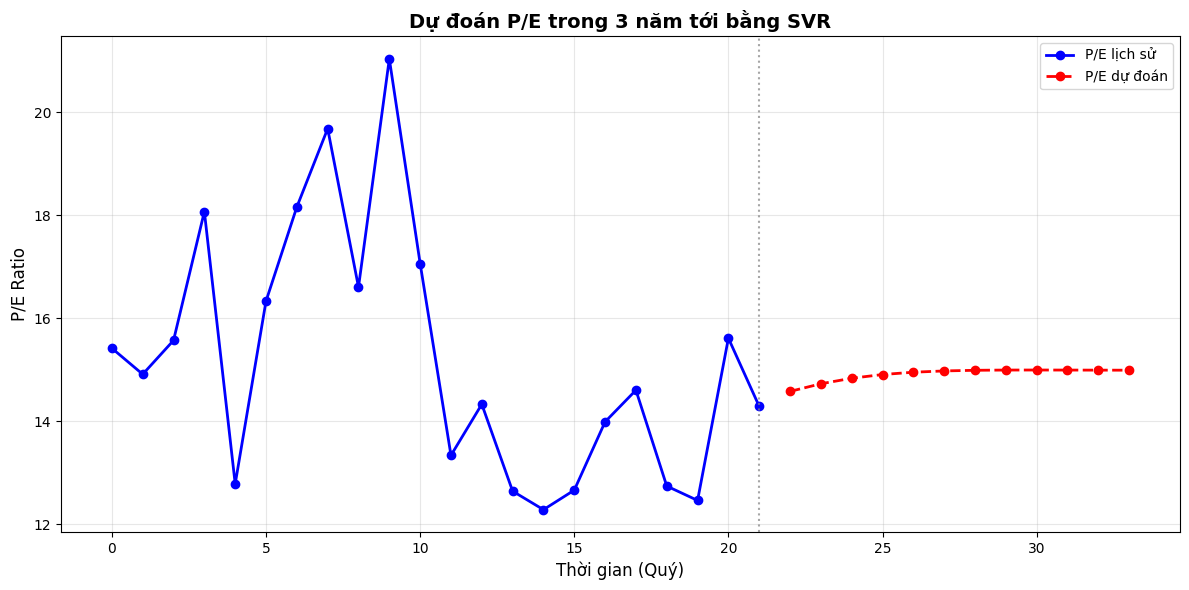

In [17]:
plt.figure(figsize=(12, 6))

# Dữ liệu lịch sử
plt.plot(range(len(y)), y, 'bo-', label='P/E lịch sử', linewidth=2, markersize=6)

# Dữ liệu dự đoán
future_x = range(len(y), len(y) + 12)
plt.plot(future_x, future_pe, 'ro--', label='P/E dự đoán', linewidth=2, markersize=6)

plt.xlabel('Thời gian (Quý)', fontsize=12)
plt.ylabel('P/E Ratio', fontsize=12)
plt.title('Dự đoán P/E trong 3 năm tới bằng SVR', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Vạch phân chia
plt.axvline(x=len(y)-1, color='gray', linestyle=':', alpha=0.7, label='Điểm dự đoán')

plt.tight_layout()
plt.show()
